## Twitter Sentiment Analysis
In bussiness Companies use Twitter Sentiment Analysis to develop their business strategies, to assess customers' feelings towards products or brand, how people respond to their campaigns or product launches and also why consumers are not buying certain products.

##Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np

## Uploading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [3]:
test=pd.read_csv('/content/drive/MyDrive/Thinkful/Data/test.csv' )


df=pd.read_csv('/content/drive/MyDrive/Thinkful/Data/train.csv' )



In [4]:
print(df.head(5))

   id  label                                              tweet
0   1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1   2      0  Finally a transparant silicon case ^^ Thanks t...
2   3      0  We love this! Would you go? #talk #makememorie...
3   4      0  I'm wired I know I'm George I was made that wa...
4   5      1  What amazing service! Apple won't even talk to...


In [5]:
df.shape

(7920, 3)

In [6]:
print(test.head(5))

     id                                              tweet
0  7921  I hate the new #iphone upgrade. Won't let me d...
1  7922  currently shitting my fucking pants. #apple #i...
2  7923  I'd like to puts some CD-ROMS on my iPad, is t...
3  7924  My ipod is officially dead. I lost all my pict...
4  7925  Been fighting iTunes all night! I only want th...


In [7]:
sample=test.copy()

In [8]:
sample.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


## Installing AutoNLP
To make use of the Hugging Face infrastructure through the AutoNLP tool, we need to register and create an account in which our models will be contained as well as our datasets. This account will provide a token that will be used to establish communication between AutoNLP CLI and the Hugging Face infrastructure.

In [9]:
!pip install -U autonlp

     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prettytable 2.1.0
    Uninstalling prettytable-2.1.0:
      Successfully uninstalled prettytable-2.1.0
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [10]:
! autonlp login api_LdmSdpfMhYIwIZiVlcypHXwZxWiWEbOplF YOUR_HUGGING_FACE_API_TOKEN

usage: autonlp <command> [<args>] login [-h] --api-key API_KEY
autonlp <command> [<args>] login: error: the following arguments are required: --api-key


In [11]:
! autonlp create_project --name sentiment_detection --language en --task binary_classification 

usage: autonlp <command> [<args>] create_project [-h] --name NAME --task TASK
                                                 --language LANGUAGE
                                                 --max_models MAX_MODELS
autonlp <command> [<args>] create_project: error: the following arguments are required: --max_models


In [12]:
!pip install autoviml

     |████████████████████████████████| 133kB 14.6MB/s 
     |████████████████████████████████| 215kB 26.4MB/s 
     |████████████████████████████████| 22.3MB 1.6MB/s 
     |████████████████████████████████| 67.3MB 57kB/s 
     |████████████████████████████████| 133kB 68.7MB/s 
     |████████████████████████████████| 133kB 63.3MB/s 
     |████████████████████████████████| 166.7MB 33kB/s 
     |████████████████████████████████| 358kB 53.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491643 sha256=fbe914706ad121748811d5cc73a94b2198f2637d8063dfac3baa039d3d5439cd
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Succ

## AutoNLP 
 is a tool to automate the process of creating end-to-end NLP models. AutoNLP is a tool developed by the Hugging Face team which was launched in its beta phase in March 2021. AutoNLP aims to automate each phase that makes up the life cycle of an NLP model, from training and optimizing the model to deploying it.

 One of the great virtues of AutoNLP is that it implements state-of-the-art models for the tasks of binary classification, multi-class classification, and entity recognition, supported in 8 languages ​​which are: English, German, French, Spanish, Finnish, Swedish, Hindi, and Dutch. Likewise, AutoNLP takes care of the optimization and fine-tuning of the models. In the security and privacy part, AutoNLP implements data transfers protected under SSL, also the data is private to each user account.

As we can see, AutoNLP emerges as a tool that facilitates and speeds up the process of creating NLP models. In the next section, will see how the experience was like from start to finish when creating a text classification model using AutoNLP. For more details click [here](https://https://towardsdatascience.com/autonlp-automatic-text-classification-with-sota-models-f4a0dd8bdbfa).

In [13]:
from sklearn.model_selection import train_test_split

from autoviml.Auto_NLP import Auto_NLP

train, test = train_test_split(df, test_size=0.2)

Imported Auto_ViML version: 0.1.681. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.45.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [14]:
input_feature = "tweet"
target = "label"

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

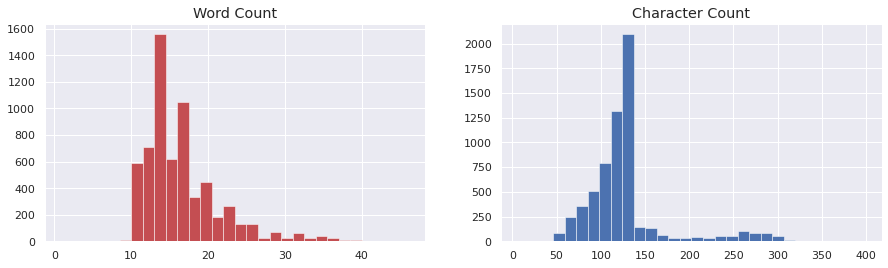

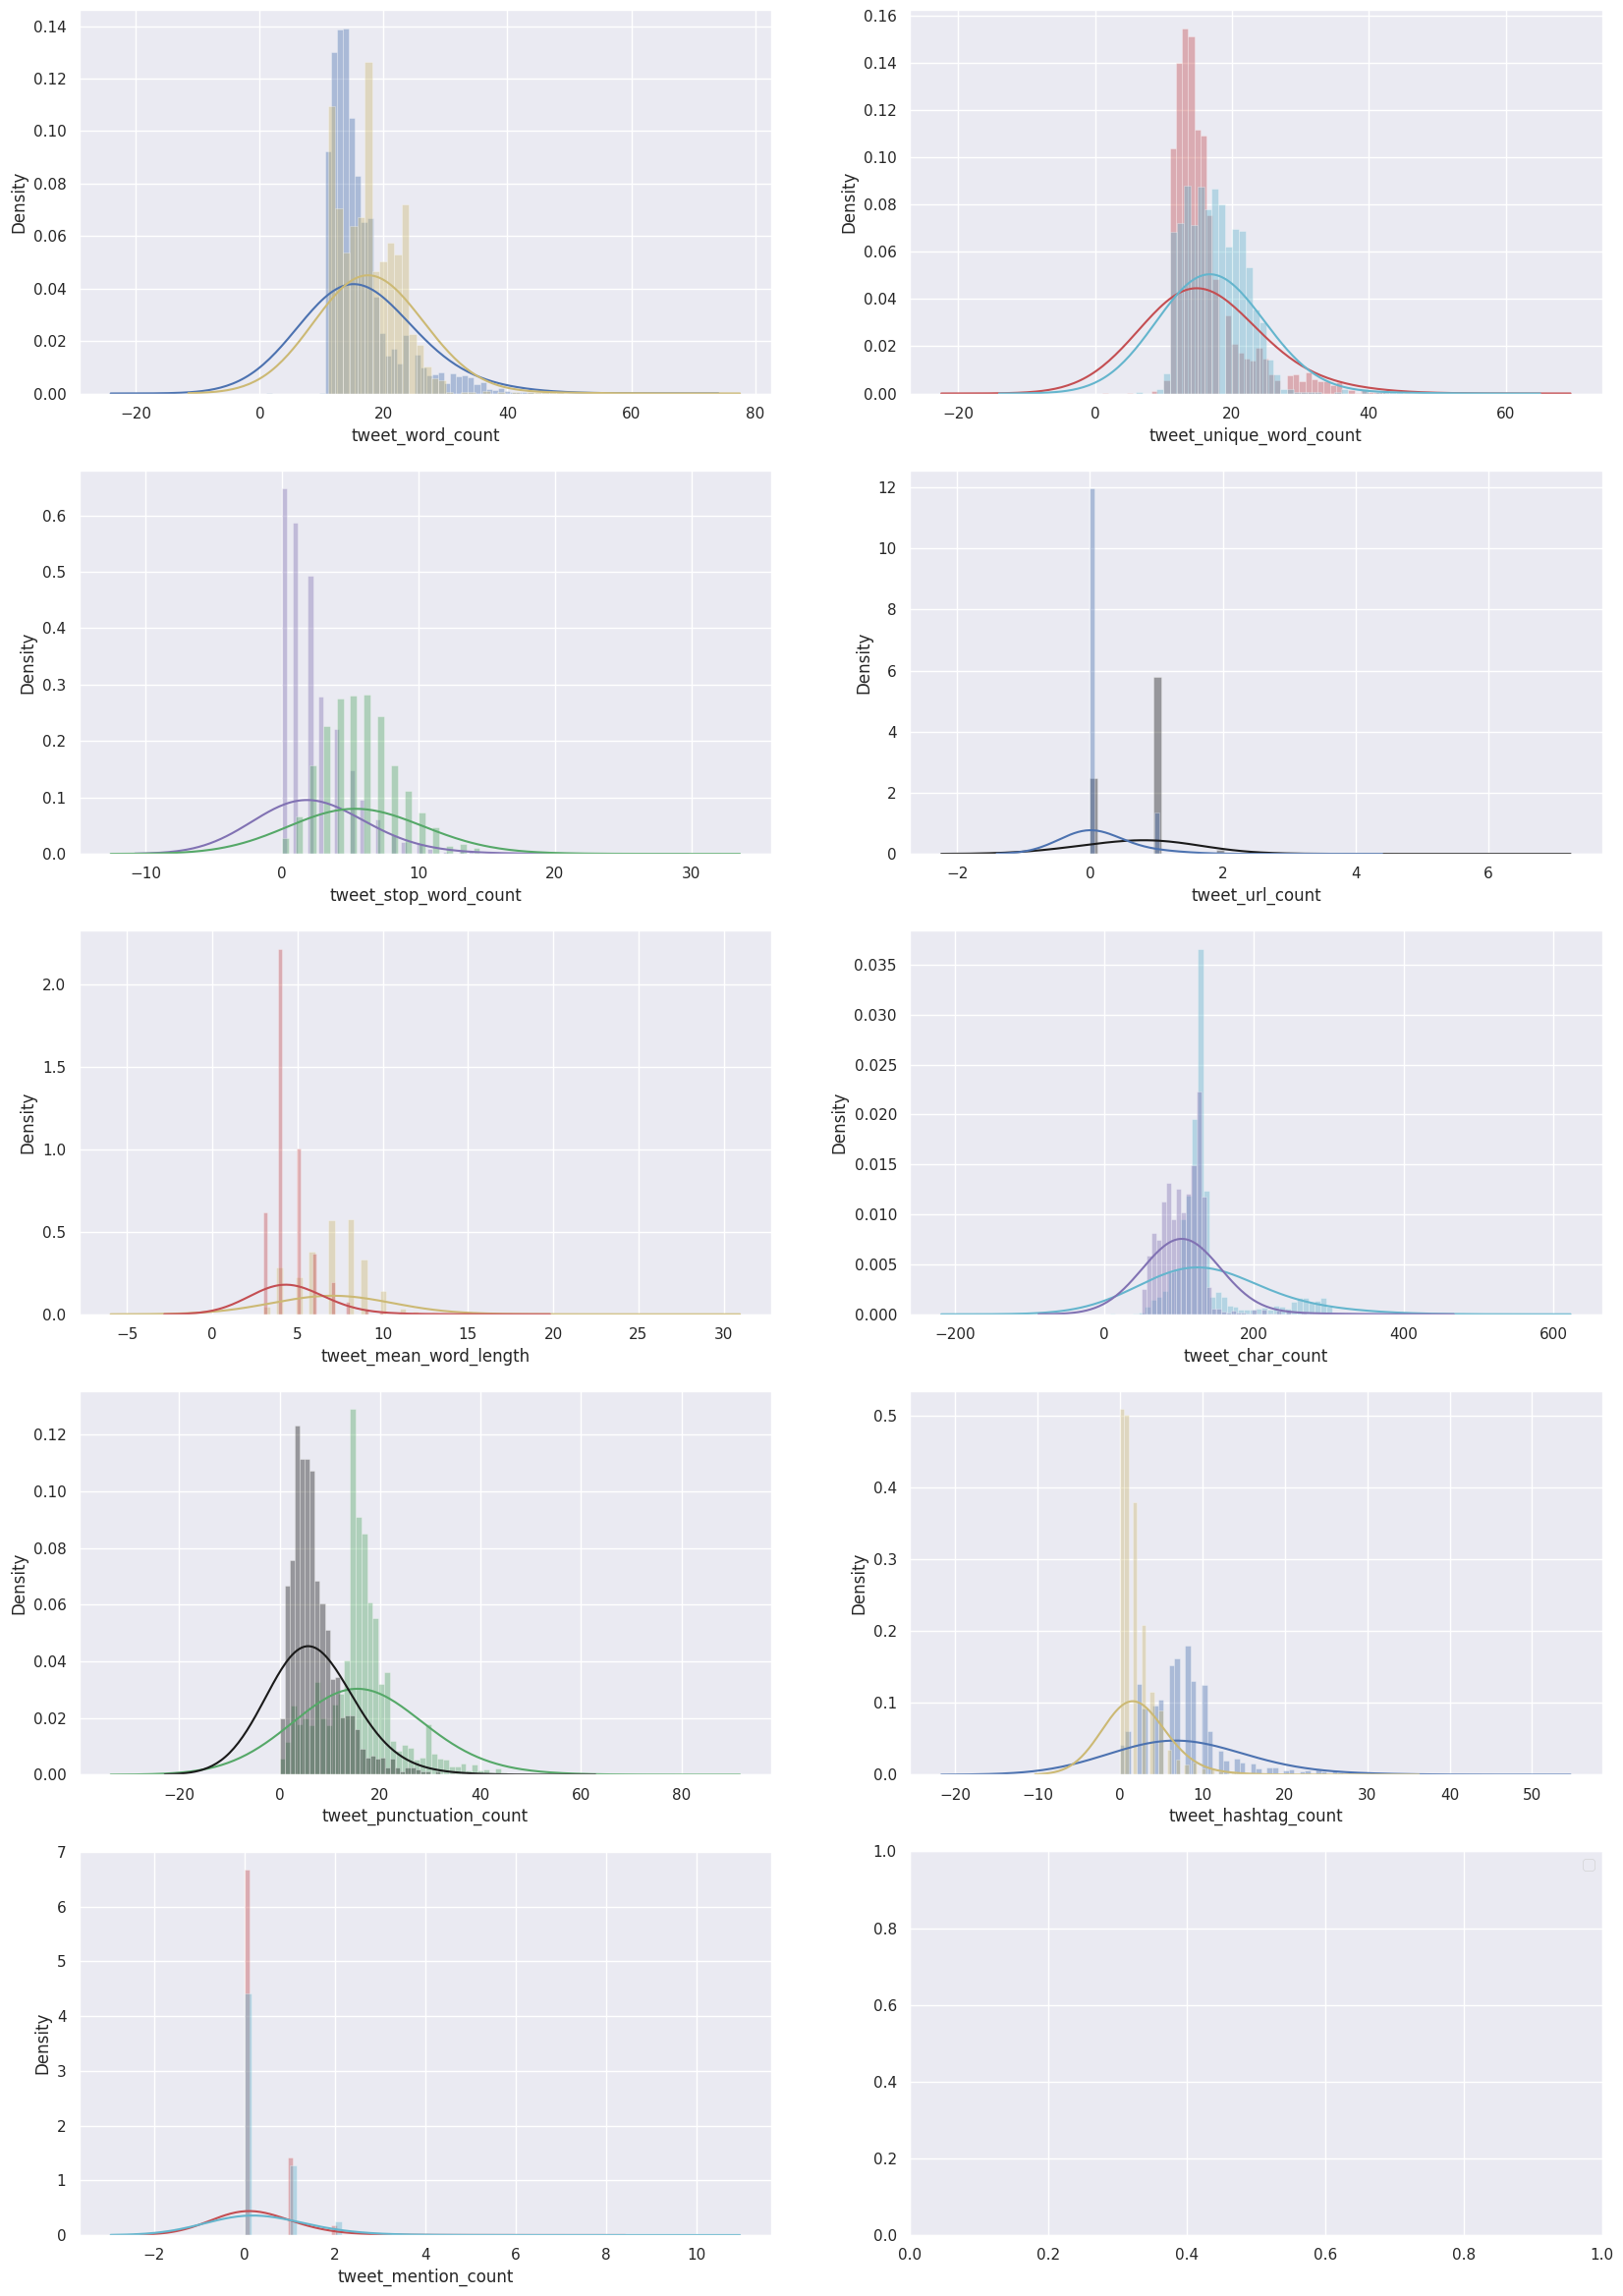

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for tweet column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 4 seconds
        Time Taken for Processing text in data = 11 seconds
Train data Text cleaning completed. Time taken = 21 seconds

For target = label

    For class = 0
Top 200 n-grams
: ['p', 'instagram', 'apple', 'samsung', 'new', 'https', 'me', 'twitter', 'instagr', 'sony', 'phone', 'love', 'www', 'pic', 'follow', 'ipad', 'retweet', 'photo', 'ly', 'day', 'cute', 'life', 'android', 'like', 'galaxy', 'fun', 'back', 'happy', 'today', 'do', 'who', 'photography', 'instagood', 'case', 'funny', 'bit', 'news', 'beautiful', 'not', 'everyone', 'sougofollow', 'gain', 'smile', 'fashion', 'make', 'must', 'now', 'co', 'girl', 'photooftheday', 'follower', 'your', 'rts', 'finally', 'music', 'ios', 'lol', 'birthday', 'baby', 'tmbl

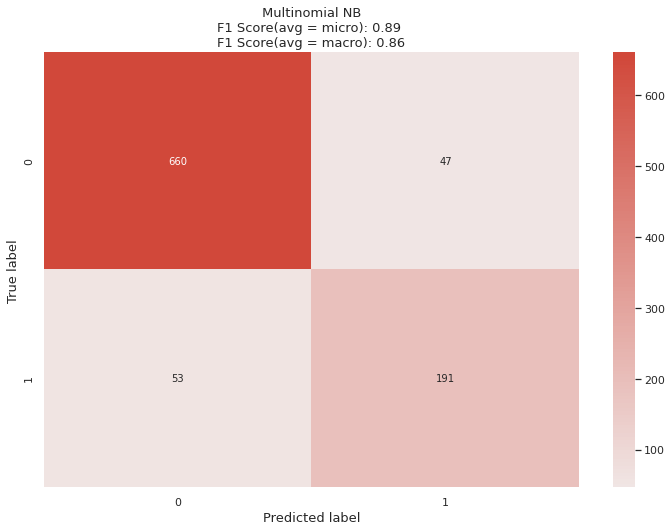

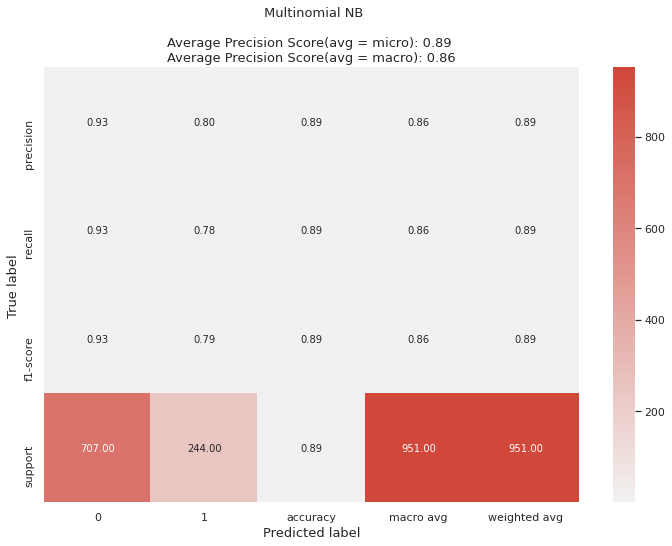

  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 3 seconds
        Time Taken for Processing text in data = 10 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 2 seconds
Training best Auto_NLP Pipeline on full Train data...will be faster since best params are known
    Time Taken for Expanding emojis and abbreviations in data = 3 seconds
        Time Taken for Processing text in data = 10 seconds
    Returning best Auto_NLP pipeline to transform and make predictions on test data...
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 2 seconds
Training completed. Time taken for Auto_NLP = 1.7 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [15]:
train_x, test_x, final, predicted= Auto_NLP(input_feature, train, test,target,
                                            score_type="balanced_accuracy",
                                            top_num_features=100,
                                            modeltype="Classification",
                                            verbose=2,
                                            build_model=True)

## The reported metrics are  accuracy , precision , recall ,and f1-score for each trained model. In our case, we see that on average the accuracy is 0.90 , which could be an acceptable value given the characteristics of our dataset. We can also see that it shows us the total cost of our training again.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
y_pred_train=final.predict(train_x[input_feature])

    Time Taken for Expanding emojis and abbreviations in data = 3 seconds
        Time Taken for Processing text in data = 10 seconds


In [18]:
print(classification_report(train.label, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      4713
           1       0.86      0.93      0.89      1623

    accuracy                           0.94      6336
   macro avg       0.92      0.94      0.93      6336
weighted avg       0.95      0.94      0.94      6336



## Inferring
Once our models are trained, they are ready to make predictions. In order to make predictions, we are going to use the predict argument as well as the model identifier, the name of the project and the phrase to be predicted, as shown in the following figure:

In [19]:
final.predict(test_x[input_feature])

    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 3 seconds


array([1, 0, 1, ..., 0, 0, 0])

In [20]:
testing = pd.read_csv('/content/drive/MyDrive/Thinkful/Data/test.csv')

In [21]:
final.predict(testing[input_feature])

    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 3 seconds


array([1, 0, 1, ..., 1, 1, 0])

In [22]:
sample['label'] = final.predict(testing[input_feature])

    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 3 seconds


## Submiting the result

In [23]:
sample.to_csv('submit.csv',index = False)